<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/salamhha/handson-ml3/blob/main/practice/Chapter06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [94]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [95]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width(cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

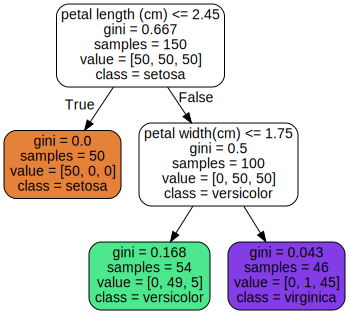

In [96]:
from graphviz import Source
Source.from_file("iris_tree.dot")

In [97]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |
 |  Attributes
 |  ----------
 |  node_count : intp_t
 |      The number of nodes (internal nodes + leaves) in the tree.
 |
 |  capacity : intp_t
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |
 |  max_depth : intp_t
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |
 |  children_left : array of intp_t, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For lea

In [98]:
tree_clf.predict_proba([[5,1.5]]).round(3)
tree_clf.predict([[5,1.5]])

array([1])

In [99]:
# Decision Tree Classifier regularization
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [100]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=42)
tree_clf1.score(X_moons_test, y_moons_test)

0.901

In [101]:
tree_clf2.score(X_moons_test, y_moons_test)

0.918

In [102]:
# Decision Tree Regression
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

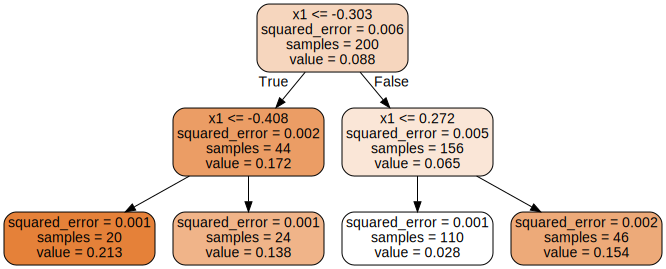

In [103]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

In [104]:
# Applying PCA to scale the data
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [105]:
# Exercise 7
# A: Use make_moons(n_samples=10000, noise=0.4) to generate a moons dataset
X_moons, y_moons = make_moons(n_samples = 10000, noise = 0.4)

# B: Use train_test_split() to split the dataset into a training set and a test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=42)

In [106]:
# C: Use grid search with cross-validation (with the help of the GridSearchCV
# class) to find good hyperparameter values for a DecisionTreeClassifier.
# Hint: try various values for max_leaf_nodes
from sklearn.model_selection import GridSearchCV
tree_clf = DecisionTreeClassifier()
param_grid = {
    "max_leaf_nodes": list(range(2,100)),
    "max_depth": list(range(2,8)),
    "min_samples_split": list(range(1,8))}

grid_search_cv = GridSearchCV(tree_clf, param_grid, cv = 3)

In [ ]:
grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_

In [ ]:
grid_search_cv.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
# Exercise 8
# A: Continuing the previous exercise, generate 1,000 subsets of the training set,
# each containing 100 instances selected randomly. Hint: you can use Scikit-
# Learn’s ShuffleSplit class for this.
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)

In [ ]:
# B: Train one decision tree on each subset, using the best hyperparameter values
# found in the previous exercise. Evaluate these 1,000 decision trees on the test
# set. Since they were trained on smaller sets, these decision trees will likely
# perform worse than the first decision tree, achieving only about 80% accuracy.
accuracy_scores = []
for X_mini_train, y_mini_train in shuffle_split.split(X_train):
  mini_tree = tree_clf.best_estimator_
  mini_tree.fit(X_mini_train, y_mini_train)
  accuracy_scores.append(mini_tree.score(X_test, y_test))

np.mean(accuracy_scores)